<a href="https://colab.research.google.com/github/tusharsharm/R-Practice/blob/main/logistic_regression_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Install Necessary Packages


install.packages("caret", dependencies=TRUE)
install.packages("mlbench")  # Needed for PIMA dataset
install.packages("pROC")     # Needed for ROC Curve
install.packages("ggplot2")  # For visualization



install.packages("dplyr")
install.packages("tidyr")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘rbibutils’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘Rdpack’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’

## Binary Classification

In this type of classification, the dataset consists of two classes. Thus, the labels are often defined as $0$ and $1$, or $-1$ and $1$. The input data can be images, text, points etc. As the name suggests, linear classifiers classify data into labels based on a linear combination of input features. Therefore, these classifiers separate data using a line or plane or a hyperplane (a plane in more than 2 dimensions). They can only be used to classify data that is linearly separable. We first use a toy dataset to show the effects of linear classification.

In [ ]:
# Load necessary library
library(ggplot2)


# 1) Generate dummy two-class data
#    (Similar to make_blobs in Python)


In [ ]:

set.seed(0)

# Number of points per class
n_class <- 500

# Simulate class 0 around (1, 4)
x1_class0 <- rnorm(n_class, mean = 1, sd = 1)
x2_class0 <- rnorm(n_class, mean = 4, sd = 1)

# Simulate class 1 around (2, 1)
x1_class1 <- rnorm(n_class, mean = 2, sd = 1)
x2_class1 <- rnorm(n_class, mean = 1, sd = 1)

# Combine into one dataset
df <- data.frame(
  x1    = c(x1_class0, x1_class1),
  x2    = c(x2_class0, x2_class1),
  class = factor(c(rep(0, n_class), rep(1, n_class)))  # binary classes
)



# 2) Plot the full dataset using similar colors

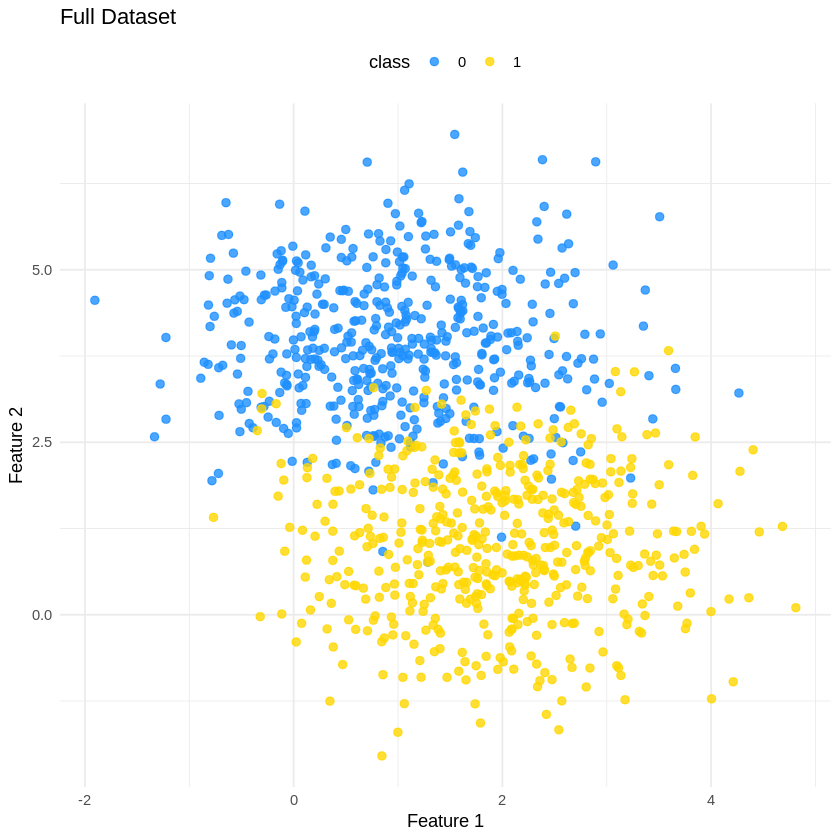

In [ ]:

ggplot(df, aes(x = x1, y = x2, color = class)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("#1E90FF", "#FFD700")) +  # Dark Purple & Yellow
  theme_minimal() +
  labs(title = "Full Dataset", x = "Feature 1", y = "Feature 2") +
  theme(legend.position = "top")



# 3) Split into train/test

In [ ]:

set.seed(123)  # for reproducibility
train_indices <- sample(seq_len(nrow(df)), size = 0.7 * nrow(df))

train_df <- df[train_indices, ]
test_df  <- df[-train_indices, ]



# 4) Plot train and test data separately

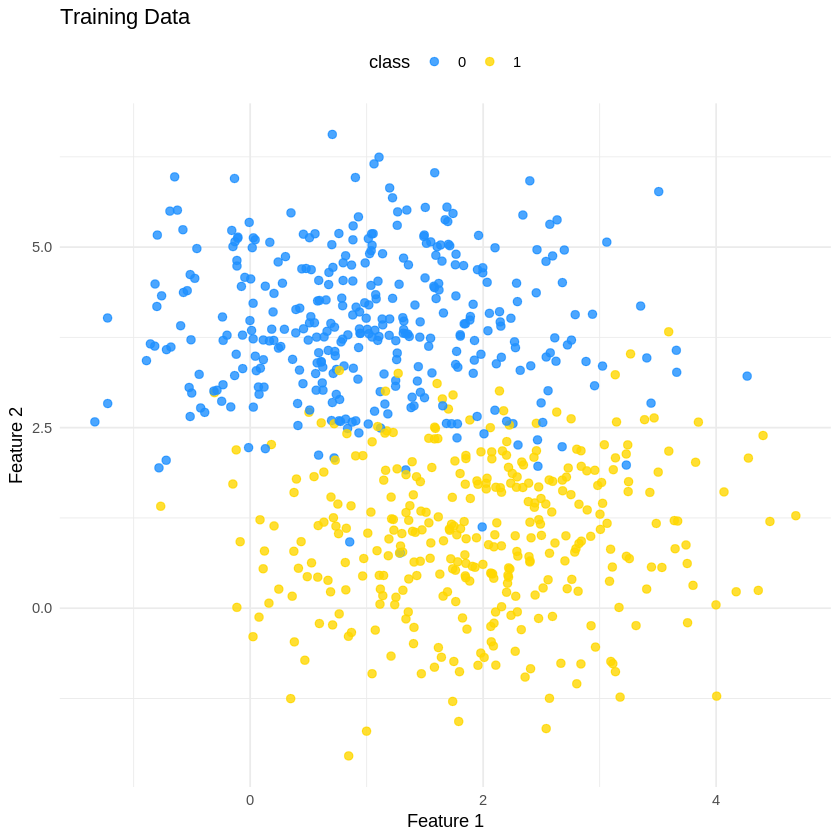

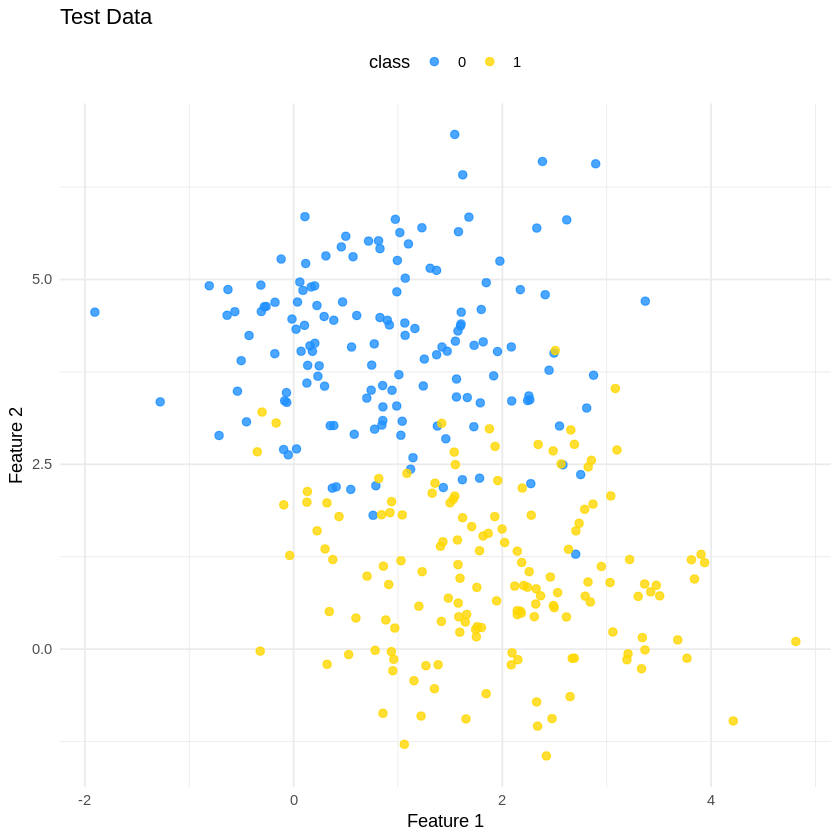

In [ ]:


# Training set
ggplot(train_df, aes(x = x1, y = x2, color = class)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("#1E90FF", "#FFD700")) +
  theme_minimal() +
  labs(title = "Training Data", x = "Feature 1", y = "Feature 2") +
  theme(legend.position = "top")

# Test set
ggplot(test_df, aes(x = x1, y = x2, color = class)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("#1E90FF", "#FFD700")) +
  theme_minimal() +
  labs(title = "Test Data", x = "Feature 1", y = "Feature 2") +
  theme(legend.position = "top")

